# Network Creation

Let's create a small Neural Network with 3 hidden layers for testing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nn_utils import *

In [2]:
n_hidden_layers = 3
n_neurons = 5
n_outputs = 3
n_inputs = 10

net = NeuralNetwork()
net.add_input_layer(10)

net.add_hidden_layer(10, 5)
net.add_hidden_layer(5, 4)
net.add_hidden_layer(4, 4)
net.add_output_layer(4, 3)


print(net) 
print(net.number_of_nodes())





INPUT LAYER: 
NODE 0 OUTPUT = 0.0
NODE 1 OUTPUT = 0.0
NODE 2 OUTPUT = 0.0
NODE 3 OUTPUT = 0.0
NODE 4 OUTPUT = 0.0
NODE 5 OUTPUT = 0.0
NODE 6 OUTPUT = 0.0
NODE 7 OUTPUT = 0.0
NODE 8 OUTPUT = 0.0
NODE 9 OUTPUT = 0.0

LAYER 0 
NODE 0 WEIGHTS = -0.3269781567049042, 0.1564046850585947, -0.24554783751794204, -0.14670965462453944, 0.2662262315791732, -0.2500572896101158, -0.42545256711373136, 0.6922808454945554, -0.1472194056821831, 0.2580040418310811,  BIAS = 0.0
NODE 1 WEIGHTS = 0.14127681708840803, 0.024288655441232394, -0.13129025146536893, -0.5952642718939574, 0.04709789983633971, -0.3179701610787386, 0.32893532486862764, 0.43042944096693786, 0.4463738269062973, 0.00383406546871002,  BIAS = 0.0
NODE 2 WEIGHTS = -0.18651966422400088, 0.11044712093564941, -0.29691904081813697, 0.16898418704305754, 0.41605030464079573, -0.21136601253051576, 0.17003588161550848, -0.06569926081989196, 0.07605126910439354, 0.6521077028634121,  BIAS = 0.0
NODE 3 WEIGHTS = -0.43110591957362515, -0.23162167962197

In [3]:
col_names = ('Input1', 'Input2', 'Input3', 'Input4', 'Input5', 'Input6', 'Input7', 'Input8', 'Input9', 'Input10', 'TARGET_x', 'TARGET_y', 'TARGET_z')
data = pd.read_csv("../ML-23-PRJ-Package/ML-CUP23-TR.csv", skiprows=7, usecols = [i for i in range (1, 14)], names = col_names)

data

,Input1,Input2,Input3,Input4,Input5,Input6,Input7,Input8,Input9,Input10,TARGET_x,TARGET_y,TARGET_z
0,-0.917280,-0.712727,-0.989904,0.992819,0.993649,0.995543,0.711074,0.407645,-0.688548,0.616890,7.897453,-35.936382,21.077147
1,-0.858784,0.998755,-0.998396,0.999909,0.316503,-0.951897,-0.163139,0.980982,0.661759,-0.800155,-9.330632,19.901571,6.069154
2,-0.990441,0.958726,-0.998675,0.997216,0.987166,0.356483,-0.279689,0.599163,-0.684630,0.922901,14.849400,3.374090,19.667479
3,0.937117,0.984474,-0.612420,0.999812,0.728623,-0.539962,-0.165939,0.999352,-0.921444,-0.974766,-46.591854,13.734777,17.953600
4,-0.906628,-0.884567,-0.932487,0.941037,0.978134,0.998179,0.749606,-0.590599,-0.508268,0.691798,8.217500,-45.885254,14.894251
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.803560,-0.878859,-0.978391,0.957539,0.996655,0.996924,-0.226305,0.097814,-0.922666,0.934153,15.389553,-41.068806,27.513502
996,0.718841,0.995748,-0.942678,0.999929,0.747763,-0.808726,0.176132,0.999100,-0.753970,-0.969009,-36.228770,13.067430,11.672133
997,-0.977912,-0.971108,0.956233,-0.979524,0.222033,0.986609,0.658273,-0.987310,0.937697,0.143420,7.265506,-53.497242,2.815666
998,0.284803,-0.988684,-0.427197,0.883317,0.993302,0.999500,-0.019456,-0.648110,-0.955231,0.901298,5.545274,-63.348396,27.989340



# Preparing Dataframe
i.e. creating the training set by removing non-training columns


In [4]:
#shuffle data
data= data.sample(frac = 1)

In [5]:
data[:100]

,Input1,Input2,Input3,Input4,Input5,Input6,Input7,Input8,Input9,Input10,TARGET_x,TARGET_y,TARGET_z
583,-0.928249,0.951282,-0.994961,0.995800,0.988008,0.557033,-0.835346,0.889854,-0.905005,0.814558,13.961784,8.228383,32.337140
198,0.930370,-0.984753,0.366865,0.864926,0.996169,0.999569,-0.121303,0.159182,-0.963169,0.550347,-9.777412,-67.524315,34.563560
829,-0.991909,0.995544,-0.999462,0.999783,0.662431,-0.860960,0.686519,0.621043,0.653304,0.582378,4.519991,6.869997,1.312744
121,-0.875395,-0.017366,-0.995372,0.998029,0.997836,0.986808,0.352246,0.899281,-0.882904,0.383765,6.655642,-20.329067,27.133291
390,-0.874698,0.882065,-0.993418,0.996505,0.994277,0.817619,-0.736979,0.932532,-0.943479,0.699712,11.841374,4.492530,32.889477
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,0.006589,0.947802,-0.974622,0.999639,0.987982,0.731236,-0.391920,0.996879,-0.932851,-0.857666,-21.871680,6.645402,30.904726
878,0.427549,-0.992908,0.290578,0.662139,0.991881,0.999557,-0.144159,-0.850889,-0.977375,0.949945,6.520555,-72.246735,28.208416
254,-0.990265,-0.823980,0.746333,-0.892518,-0.684035,0.938868,0.163099,-0.974384,0.990203,-0.583426,3.194378,-35.984486,2.199761
467,-0.814592,0.416405,-0.993212,0.992516,0.997602,0.966170,-0.602528,0.898566,-0.951395,0.772447,13.299667,-6.438751,33.147747


total Error pre-training = 433.6360703547246
Epoch = 1, total Error post-training = 432.506317433152
Epoch = 2, total Error post-training = 431.4109745715531
Epoch = 3, total Error post-training = 430.2222544095878
Epoch = 4, total Error post-training = 429.0347068431006
Epoch = 5, total Error post-training = 427.6322877857885
Epoch = 6, total Error post-training = 425.63741446172656
Epoch = 7, total Error post-training = 423.45219349544243
Epoch = 8, total Error post-training = 420.73599226607007
Epoch = 9, total Error post-training = 418.36080828488116
Epoch = 10, total Error post-training = 417.0160579814913
Epoch = 11, total Error post-training = 416.92604318972093
Epoch = 12, total Error post-training = 418.5483543571199
Epoch = 13, total Error post-training = 421.79163713207475
Epoch = 14, total Error post-training = 426.4522742028429
Epoch = 15, total Error post-training = 429.0497979822386
Epoch = 16, total Error post-training = 434.77552618466325
Epoch = 17, total Error post-t

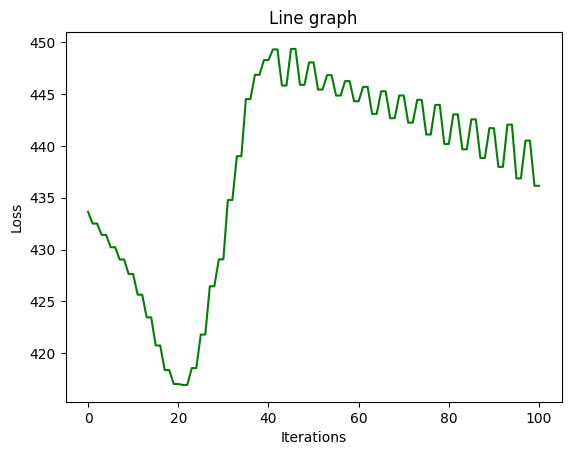

In [18]:
tr_data_X = data[['Input1', 'Input2', 'Input3', 'Input4', 'Input5', 'Input6', 'Input7', 'Input8', 'Input9', 'Input10']]

tr_data_Y = data[['TARGET_x', 'TARGET_y', 'TARGET_z']]

loss = net.train(tr_data_X, tr_data_Y, epochs=50, eta=0.2, clip_value=3)
iterations = np.arange(len(loss))
print(net)
print(net.input_layer.weights)

plt.title("Line graph") 
plt.xlabel("Iterations") 
plt.ylabel("Loss") 
plt.plot(iterations, loss, color ="green") 
plt.show()


In [7]:
np.dot(net.hidden_layers[0].output,net.hidden_layers[1].weights)

array([ 1.08942843,  1.0356988 , -0.08261469,  1.32002315])

In [8]:
net.output_layer.output

array([-0.01553757, -0.05060241,  2.69412652])

In [9]:
for row,label in zip(tr_data_X.itertuples(index = False, name = None),tr_data_Y.itertuples(index=False,name=None)):
    #Forward propagation
    net.forwardPropagation(row,label)
    print(np.array(label))
    print(net.output_layer.output)
    break
          

[13.961784  8.228383 32.33714 ]
[-0.01162083 -0.02457447  3.29505802]


In [10]:
a=np.array([10,-3])

In [11]:
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

In [12]:
leaky_relu(a)

array([10.  , -0.03])

In [13]:
def clip_gradients(gradients, clip_value):
    clipped_gradients = []
    for gradient in gradients:
        clipped_gradient = np.clip(gradient, -clip_value, clip_value)
        clipped_gradients.append(clipped_gradient)
    return clipped_gradients

In [14]:
data[:100]

,Input1,Input2,Input3,Input4,Input5,Input6,Input7,Input8,Input9,Input10,TARGET_x,TARGET_y,TARGET_z
583,-0.928249,0.951282,-0.994961,0.995800,0.988008,0.557033,-0.835346,0.889854,-0.905005,0.814558,13.961784,8.228383,32.337140
198,0.930370,-0.984753,0.366865,0.864926,0.996169,0.999569,-0.121303,0.159182,-0.963169,0.550347,-9.777412,-67.524315,34.563560
829,-0.991909,0.995544,-0.999462,0.999783,0.662431,-0.860960,0.686519,0.621043,0.653304,0.582378,4.519991,6.869997,1.312744
121,-0.875395,-0.017366,-0.995372,0.998029,0.997836,0.986808,0.352246,0.899281,-0.882904,0.383765,6.655642,-20.329067,27.133291
390,-0.874698,0.882065,-0.993418,0.996505,0.994277,0.817619,-0.736979,0.932532,-0.943479,0.699712,11.841374,4.492530,32.889477
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,0.006589,0.947802,-0.974622,0.999639,0.987982,0.731236,-0.391920,0.996879,-0.932851,-0.857666,-21.871680,6.645402,30.904726
878,0.427549,-0.992908,0.290578,0.662139,0.991881,0.999557,-0.144159,-0.850889,-0.977375,0.949945,6.520555,-72.246735,28.208416
254,-0.990265,-0.823980,0.746333,-0.892518,-0.684035,0.938868,0.163099,-0.974384,0.990203,-0.583426,3.194378,-35.984486,2.199761
467,-0.814592,0.416405,-0.993212,0.992516,0.997602,0.966170,-0.602528,0.898566,-0.951395,0.772447,13.299667,-6.438751,33.147747
